In [31]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [32]:
data=pd.read_csv(r"C:\Users\sagar\Downloads\gender_submission.csv")
data.head(30)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


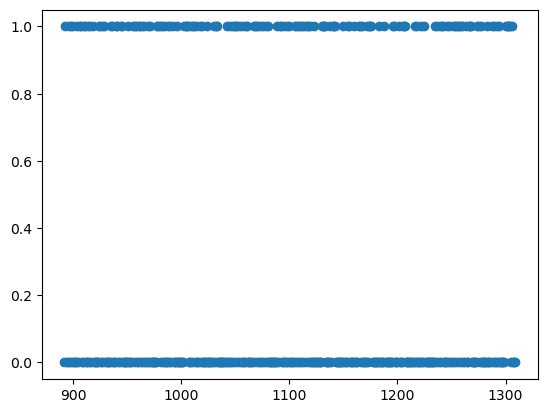

In [33]:
plt.scatter(data["PassengerId"],data["Survived"])
plt.show()

In [34]:
data.isnull().sum()


PassengerId    0
Survived       0
dtype: int64

In [35]:
data.min(),data.max()
data["Survived"].value_counts()
data.drop_duplicates(inplace=True)
from sklearn.model_selection import train_test_split
x=data[["PassengerId"]]
y=data["Survived"]

In [36]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=1)
pf.fit(x)
x=pd.DataFrame(pf.transform(x))

In [37]:
from imblearn.over_sampling import RandomOverSampler
ru=RandomOverSampler()
ru_x,ru_y=ru.fit_resample(x,y)
ru_y.value_counts()
x_train,x_test,y_train,y_test=train_test_split(ru_x,ru_y,test_size=0.002,random_state=42)

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=50)
dt.fit(x_train,y_train)
dt.score(x_test,y_test)*100,dt.score(x_train,y_train)*100

(100.0, 100.0)